In [1]:
# Load the necessary packages and modules
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()

In [3]:
# Calculate money flow index
# Contributed by Github member and chatgpt
def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close) / 3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign

    # Calculate gain and loss using vectorized operations
    positive_mf = np.where(signed_mf > 0, signed_mf, 0)
    negative_mf = np.where(signed_mf < 0, -signed_mf, 0)

    mf_avg_gain = pd.Series(positive_mf).rolling(n, min_periods=1).sum()
    mf_avg_loss = pd.Series(negative_mf).rolling(n, min_periods=1).sum()

    return (100 - 100 / (1 + mf_avg_gain / mf_avg_loss)).to_numpy()

In [4]:
# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 14)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Plotting the Price Series chart and the MFI below
fig = plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

In [6]:
# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

Text(0, 0.5, 'MFI values')

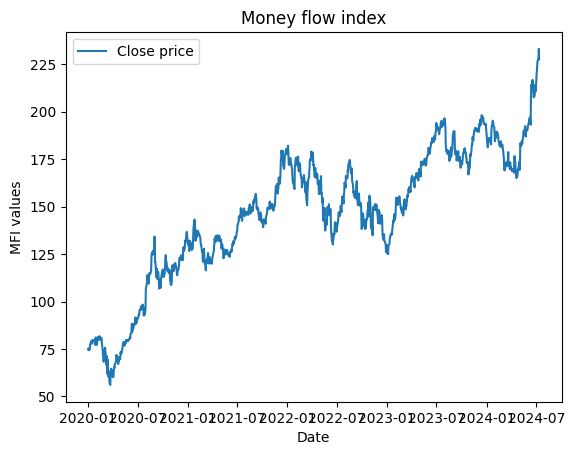

In [7]:
# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')